# ObsID : 0945030131, SRCNUM : 2, Instru : EPN
**Simbad :** Seyfert 2 Galaxy *LEDA 738553* (https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40655476&Name=LEDA%20%20738553&submit=submit).

## ESASky

https://sky.esa.int/esasky/?target=52.152833333333334%20-28.698750000000004&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J032836.5-284155
- IAU name : 4XMM J032836.5-284155
- RA : 03h 28m 36.510s
- DEC : -28° 41' 55.73"

``GAIA``

- Designation : Gaia DR3 5057350452336259072
- RA : 03h 28m 36.494s
- DEC : -28° 41' 56.45"

or
- Designation : Gaia DR3 5057350452333817344
- RA : 03h 28m 36.516s
- DEC : -28° 41' 55.88"

``GLADE``

- No : 1 237 143
- RA : 03h 28m 36.522s
- DEC : -28° 41' 55.47"
- Distance : 518.6552 Mpc

``2MASS``

- Name : 03283650-2841559
- RA : 03h 28m 36.506s
- DEC : -28° 41' 55.92"

``eROSITA``

- IAUNAME : 1eRASS J032836.4-284155
- RA : 03h 28m 36.445s
- DEC : -28° 41' 55.05"

In [15]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

### Redshift

In [2]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(518.6552)
print("Redshift : z =", z)

Redshift : z = 0.12110332675547163


## Fit statistic

In [3]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [4]:
AllData.clear()
spec = Spectrum(glob.glob("P*PNS*SRSPEC*.FTZ")[0])


1 spectrum  in use
 
Spectral Data File: P0945030131PNS003SRSPEC0002.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.756e-02 +/- 1.677e-03 (89.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-17
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.131e+04 sec
 Using fit statistic: chi
 Using Background File                P0945030131PNS003BGSPEC0002.FTZ
  Background Exposure Time: 1.131e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY2.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945030131PNS003SRCARF0002.FTZ



In [5]:
n_cts = 2.756e-02*1.131e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 311.7036


## Plot spectrum

In [6]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot("data")
spec.ignore("**-0.2 12.0-**")

      No channels ignored (no channels in specified range)
     1 channels (17) ignored in spectrum #     1



(-0.5, 861.5, 661.5, -0.5)

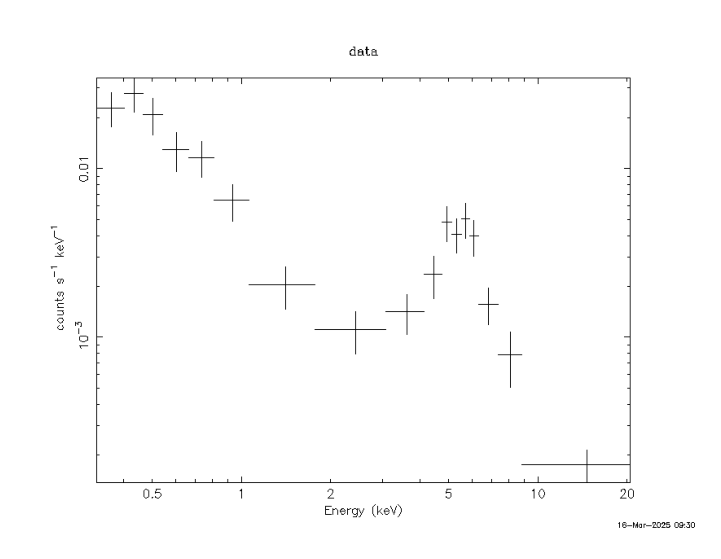

In [7]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [8]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.007443e+11     using 16 bins.

Te

(-0.5, 859.5, 662.5, -0.5)

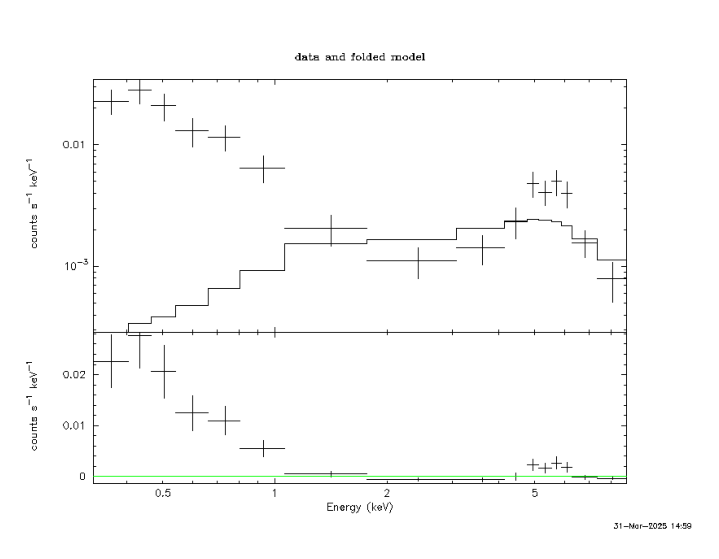

In [34]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [9]:
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.006578e+11     using 16 bins.

Test statistic : Chi-Squared              1.006578e+11     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.099043e+11     using 16 bins.

Test statistic : Chi-Squared              1.099043e+11     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
        

### Bremsstrahlung model
**tbabs :**

In [11]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.154364e+10     using 16 bins.

Test statistic : Chi-Squared              1.154364e+10     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
178.063      0.289807     -1     0.0794816       52.3362   3.09346e-05
169.699      249976       -1     0.0388490       199.284   4.62621e-05
154.269      180791       -1    0.00946443       199.345   5.53774e-05


(-0.5, 854.5, 661.5, -0.5)

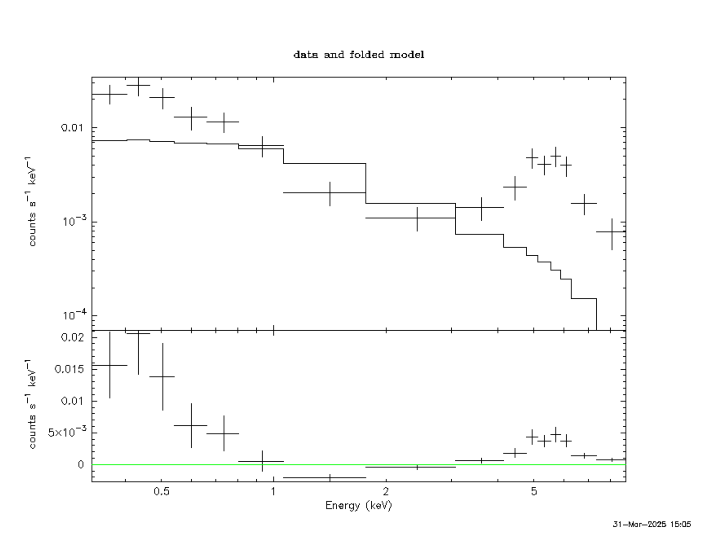

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [13]:
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.147780e+10     using 16 bins.

Test statistic : Chi-Squared              1.147780e+10     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.562142e+10     using 16 bins.

Test statistic : Chi-Squared              1.562142e+10     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
       

### Apec model
**tbabs :**

In [14]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.848353e+09     using 16 bins.

Test statistic : Chi-Squared              2.848353e+09     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
207.782      2.38568       0      0.989199      0.849109   

(-0.5, 856.5, 656.5, -0.5)

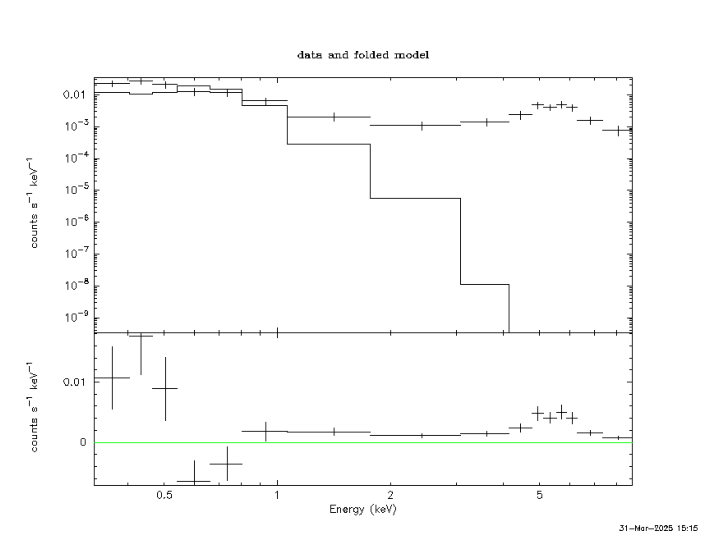

In [15]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [16]:
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.770859e+09     using 16 bins.

Test statistic : Chi-Squared              2.770859e+09     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              6.450943e+09     using 16 bins.

Test statistic : Chi-Squared              6.450943e+09     using 1

### Powerlaw model

In [17]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.931275e+10     using 16 bins.

Test statistic : Chi-Squared              4.931275e+10     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
163.489      5.00447      -1      0.891125      0.277057   1.48614e-05
132.044      464935       -1      0.554685     -0.510341   7.94292e-06
127.857      337359       -2     0.0989877      -1.49755   1.86049e-0

(-0.5, 856.5, 656.5, -0.5)

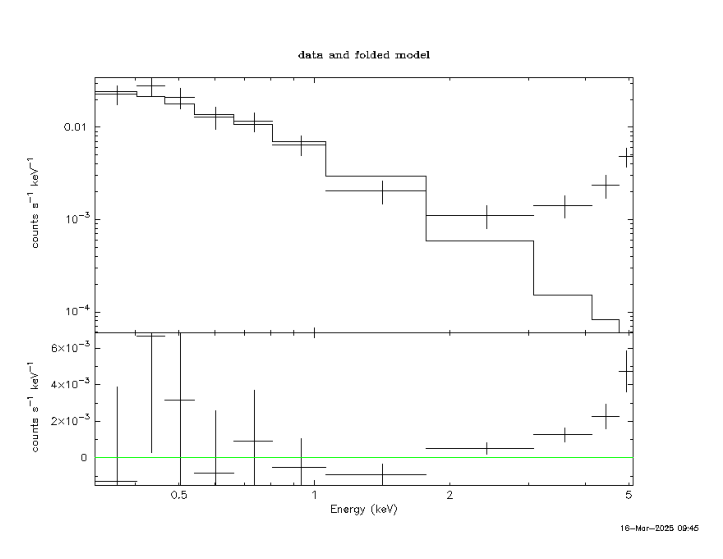

In [18]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [19]:
AllModels.clear()
moz = Model("ztbabs*powerlaw")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   4    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.913110e+10     using 16 bins.

Test statistic : Chi-Squared              4.913110e+10     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              6.172807e+10     using 16 bins.

Test statistic : Chi-Squared              6.172807e+10     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
     

### Black body + Powerlaw model (Second best fit)
**tbabs :**

In [20]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.746427e+11     using 16 bins.

Test statistic : Chi-Squared              2.746427e+11     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
146.362      60786.7 

(-0.5, 856.5, 657.5, -0.5)

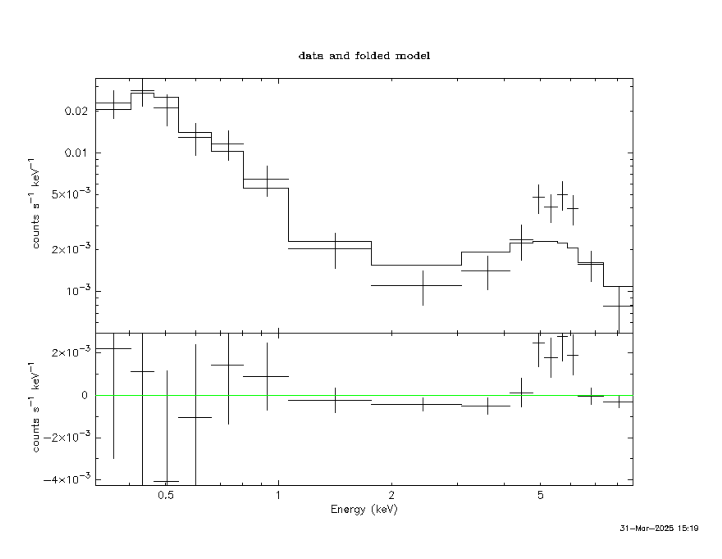

In [21]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [22]:
AllModels.clear()
moz = Model("ztbabs*(bbody+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.741421e+11     using 16 bins.

Test statistic : Chi-Squared              2.741421e+11     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              3.153866e+11     using 16 bins.

Test statistic : Chi-Squar

### Bremss + Powerlaw model (Best fit)
**tbabs :**

In [23]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.074203e+11     using 16 bins.

Test statistic : Chi-Squared              1.074203e+11     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
143.602      23804.2

(-0.5, 856.5, 655.5, -0.5)

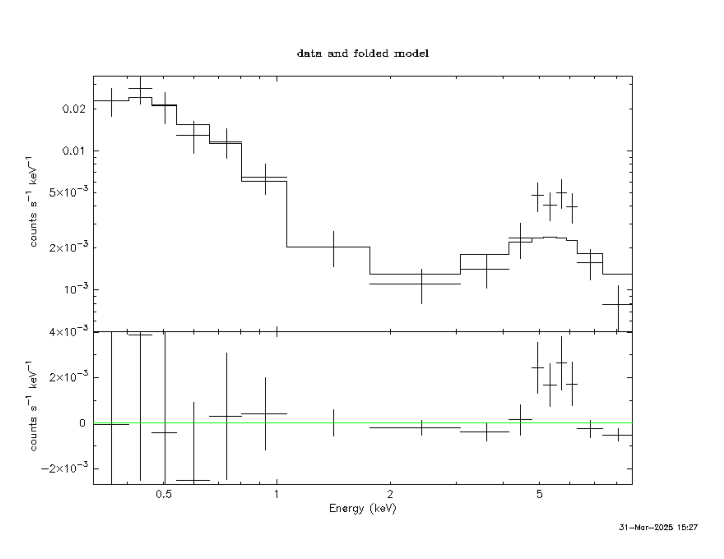

In [24]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremsspowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [25]:
AllModels.clear()
moz = Model("ztbabs*(bremss+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.069554e+11     using 16 bins.

Test statistic : Chi-Squared              1.069554e+11     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 11 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.379913e+11     using 16 bins.

Test statistic : Chi-Squa

### Apec + Apec model
**tbabs :**

In [26]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.139482e+10     using 16 bins.

Test statistic : Chi-Squared              1.139482e+10     using 16 bins.
 Null hypothesis probability

(-0.5, 857.5, 657.5, -0.5)

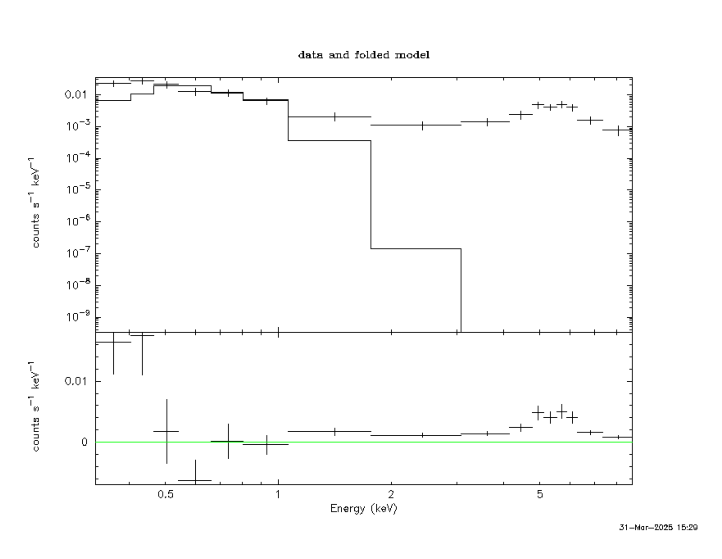

In [27]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apecapec.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [28]:
AllModels.clear()
moz = Model("ztbabs*(apec+apec)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
   7    3   apec       kT         keV      1.00000      +/-  0.0          
   8    3   apec       Abundanc            1.00000      frozen
   9    3   apec       Redshift            0.0          frozen
  10    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.108482e+10     using 16 bins.

Test statistic : Chi-Squared          

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.1521261°
- Dec = -28.6988132°

52.15 -28.70

**Column density :** nH = 2*10^20 cm^-2

In [29]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print(f"(ztbabs) : {nH_bbody_z*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print(f"(ztbabs) : {nH_bremss_z*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print(f"(ztbabs) : {nH_apec_z*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print(f"(ztbabs) : {nH_powerlaw_z*10**22}")
print()
print(color.BOLD+"bbody+powerlaw (Second best fit)"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print(f"(ztbabs) : {nH_bbodypowerlaw_z*10**22}")
print()
print(color.BOLD+"bremss+powerlaw (Best fit)"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")
print(f"(ztbabs) : {nH_bremsspowerlaw_z*10**22}")
print()
print(color.BOLD+"apec+apec"+color.END)
print(f"(tbabs) : {nH_apecapec*10**22}")
print(f"(ztbabs) : {nH_apecapec_z*10**22}")

The different models give a column density of :

bbody
(tbabs) : 388518.7599276106
(ztbabs) : 216459.0480680507

bremss
(tbabs) : 362408.2567781823
(ztbabs) : 249013.2072929794

apec
(tbabs) : 353560176005993.56
(ztbabs) : 9.958196797155358e+21

powerlaw
(tbabs) : 531011.1610928678
(ztbabs) : 15380.371630526444

bbody+powerlaw (Second best fit)
(tbabs) : 2.3705015178588135e+21
(ztbabs) : 6.278739496918985e+21

bremss+powerlaw (Best fit)
(tbabs) : 6.063892356712649e+20
(ztbabs) : 8.734367078494942e+20

apec+apec
(tbabs) : 7.595730046432005e+21
(ztbabs) : 7.372616294400128e+21


## Flux
### X-ray flux
- X-ray Flux of the best-fitting model ``Bremsstrahlung + Powerlaw`` with Chi-squared = 22.4610 using 16 bins: **4.5e-12 ergs/cm^2/s**.
- X-ray Flux of the second best-fitting model ``Black body + Powerlaw`` with Chi-squared = 24.9109 using 16 bins: **3.6685e-12 ergs/cm^2/s**.

In [5]:
Flux_bp = 4.5e-12 # ergs/cm^2/s
Flux_bbp = 3.6685e-12 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremsstrahlung + Powerlaw: F_x-ray = {Flux_bp} ergs/cm^2/s")
print(f"Black body + Powerlaw: F_x-ray = {Flux_bbp} ergs/cm^2/s")

X-ray flux : 
Bremsstrahlung + Powerlaw: F_x-ray = 4.5e-12 ergs/cm^2/s
Black body + Powerlaw: F_x-ray = 3.6685e-12 ergs/cm^2/s


### Optical flux
GAIA gives two magnitude values for the same source.

In [12]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G1 = 20.6498
G2 = 20.9118

F1 = F_optical(G1)
F2 = F_optical(G2)

print(color.BOLD+"Optical flux : "+color.END)
print(f"For G = 20.6498 : F_optical = {F1} ergs/cm^2/s")
print(f"For G = 20.9118 : F_optical = {F2} ergs/cm^2/s")

Optical flux : 
For G = 20.6498 : F_optical = 5.771242179692641e-14 ergs/cm^2/s
For G = 20.9118 : F_optical = 4.533872460198628e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [14]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Bremsstrahlung + Powerlaw :")
print(f"For G = 20.6498 : F_x-ray/F_optical = {Flux_bbp/F1}")
print(f"For G = 20.9118 : F_x-ray/F_optical = {Flux_bbp/F2}")
print(f"Black body + Powerlaw :")
print(f"For G = 20.6498 : F_x-ray/F_optical = {Flux_bp/F1}")
print(f"For G = 20.9118 : F_x-ray/F_optical = {Flux_bp/F2}")

X-ray Flux / Optical Flux ratio : 
Bremsstrahlung + Powerlaw :
For G = 20.6498 : F_x-ray/F_optical = 63.56517168710071
For G = 20.9118 : F_x-ray/F_optical = 80.91317151517941
Black body + Powerlaw :
For G = 20.6498 : F_x-ray/F_optical = 77.97281520838303
For G = 20.9118 : F_x-ray/F_optical = 99.25290222660688


## Luminosity

In [11]:
"""GLADE"""

d_kpc = 518655.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_bbp = 4*np.pi*Flux_bbp*(d_cm)**2 # erg/s
Luminosity_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(color.BOLD+"Distance : "+color.END+f"d = {d_cm} cm")
print(color.BOLD+"Luminosity : "+color.END)
print(f"Bremsstrahlung + Powerlaw : L_x-ray = {Luminosity_bbp} erg/s")
print(f"Black body + Powerlaw : L_x-ray = {Luminosity_bp} erg/s")

(GLADE)
Distance : d = 1.60041435064e+27 cm
Luminosity : 
Bremsstrahlung + Powerlaw : L_x-ray = 1.180764428967752e+44 erg/s
Black body + Powerlaw : L_x-ray = 1.44839578311432e+44 erg/s
